## Chapter 2
This is a GNU Octave version of the Fundamentals of Numerical Computation Jupyter Notebooks found at https://tobydriscoll.net/project/fnc/. 

### Example 2.1.1  Vandermonde Interpolation

We create two vectors for data about the population of China. The first has the years of census data, the other has the numbers of millions of people.

In [1]:
year = (1980:10:2010)'  
pop = [984.736; 1148.364; 1263.638; 1330.141];

year =

   1980
   1990
   2000
   2010



It's convenient to measure time in years since 1980.

In [2]:
t = year - 1980;
y = pop;

Now we have four data points , so  and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix: 

In [3]:
V = zeros(4,4);
for i = 1:4
    V(i,:) = [1 t(i) t(i)^2 t(i)^3];
end
V

V =

       1       0       0       0
       1      10     100    1000
       1      20     400    8000
       1      30     900   27000



To solve for the vector of polynomial coefficients, we use a backslash:

In [4]:
c = V \ y

c =

   984.736000000
    18.766600000
    -0.239685000
    -0.000069500



The algorithms used by the backslash operator are the main topic of this chapter. For now, observe that the coefficients of the cubic polynomial vary over several orders of magnitude, which is typical in this context. By our definitions, these coefficients are given in ascending order of power in . MATLAB always expects the decreasing-degree order, so we convert ours to this convention here.

In [5]:
c = c(end:-1:1);       % reverse the ordering

We can use the resulting polynomial to estimate the population of China in 2005:

In [6]:
polyval(c,2005-1980)   % apply the 1980 time shift

ans =  1303.0


The official figure is 1297.8, so our result is not bad. 

We can visualize the interpolation process. First, we plot the data as points. We'll shift the  variable back to actual years. 

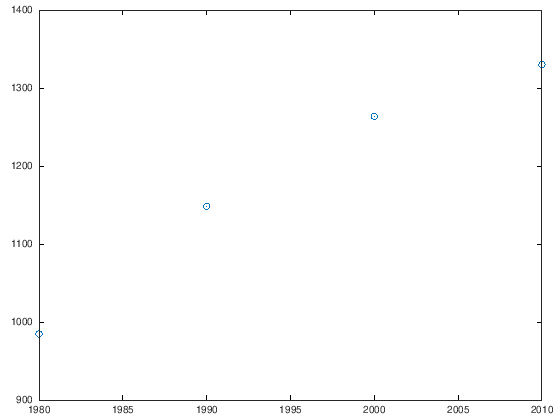

In [7]:
plot(1980+t,y,'o')

We want to superimpose a plot of the polynomial. In order to add to a plot, we must use the hold command:

To plot the interpolating polynomial, we create a vector with many points in the time interval using linspace.

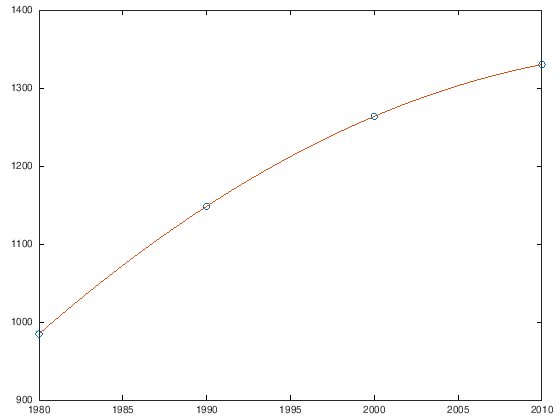

In [8]:
plot(1980+t,y,'o')
hold on
tt = linspace(0,30,300)';   % 300 times from 1980 to 2010
yy = polyval(c,tt);         % evaluate the cubic
plot(1980+tt,yy)
hold off

Let's clear the figure (clf) and redo it, this time continuing the curve outside of the original date range. We'll also annotate the graph (using title, xlabel, ylabel and legend) to make its purpose clear.

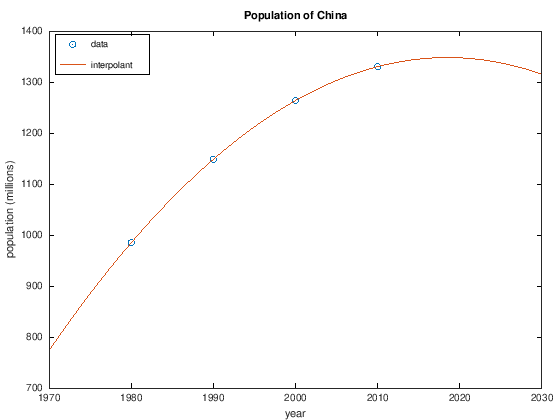

In [9]:
clf   % clear figure
plot(1980+t,y,'o')
hold on
tt = linspace(-10,50,300)';   
plot(1980+tt,polyval(c,tt))
title('Population of China')
xlabel('year'), ylabel('population (millions)')
legend('data','interpolant','location','northwest')

While the interpolation is plausible, the extrapolation to the future is highly questionable! As a rule, extrapolation more than a short distance beyond the original interval is not reliable.

### Example 2.2.1 MATLAB Demo

Square brackets are used to enclose elements of a matrix or vector. Use spaces or commas for horizontal concatenation, and semicolons or new lines to indicate vertical concatenation.

In [10]:
A = [ 1, 2, 3, 4, 5; 50 40 30 20 10
    pi, sqrt(2), exp(1), (1+sqrt(5))/2, log(3) ]

A =

    1.0000    2.0000    3.0000    4.0000    5.0000
   50.0000   40.0000   30.0000   20.0000   10.0000
    3.1416    1.4142    2.7183    1.6180    1.0986



In [11]:
[m,n] = size(A)

m =  3
n =  5


A vector is considered to be a matrix with one singleton dimension.

In [12]:
x = [ 3; 3; 0; 1; 0 ]
size(x)

x =

   3
   3
   0
   1
   0

ans =

   5   1



Concatenated elements within brackets may be matrices for a block representation, as long as all the block sizes are compatible.

In [13]:
AA = [ A; A ]
B = [ zeros(3,2), ones(3,1) ]

AA =

    1.0000    2.0000    3.0000    4.0000    5.0000
   50.0000   40.0000   30.0000   20.0000   10.0000
    3.1416    1.4142    2.7183    1.6180    1.0986
    1.0000    2.0000    3.0000    4.0000    5.0000
   50.0000   40.0000   30.0000   20.0000   10.0000
    3.1416    1.4142    2.7183    1.6180    1.0986

B =

   0   0   1
   0   0   1
   0   0   1



The dot-quote .' transposes a matrix. A single quote ' on its own performs the hermitian (transpose and complex conjugation). For a real matrix, the two operations are the same.

In [14]:
A'

ans =

    1.0000   50.0000    3.1416
    2.0000   40.0000    1.4142
    3.0000   30.0000    2.7183
    4.0000   20.0000    1.6180
    5.0000   10.0000    1.0986



In [15]:
x'

ans =

   3   3   0   1   0



There are some convenient shorthand ways of building vectors and matrices other than entering all of their entries directly or in a loop. To get a row vector with evenly spaced entries between two endpoints, you have two options.

In [16]:
row = 1:4              % start:stop
col = ( 0:3:12 )'      % start:step:stop

row =

   1   2   3   4

col =

    0
    3
    6
    9
   12



In [17]:
s = linspace(-1,1,5)'  % start,stop,number

s =

  -1.00000
  -0.50000
   0.00000
   0.50000
   1.00000



Accessing an element is done by giving one (for a vector) or two index values in parentheses. The keyword end as an index refers to the last position in the corresponding dimension.

In [18]:
a = A(2,end-1)

a =  20


In [19]:
x(2)

ans =  3


The indices can be vectors, in which case a block of the matrix is accessed.

In [20]:
A(1:2,end-2:end)    % first two rows, last three columns

ans =

    3    4    5
   30   20   10



If a dimension has only the index : (a colon), then it refers to all the entries in that dimension of the matrix.

In [21]:
A(:,1:2:end)        % all of the odd columns

ans =

    1.0000    3.0000    5.0000
   50.0000   30.0000   10.0000
    3.1416    2.7183    1.0986



The matrix and vector senses of addition, subtraction, scalar multiplication, multiplication, and power are all handled by the usual symbols. If matrix sizes are such that the operation is not defined, an error message will result.

In [22]:
B = diag( [-1 0 -5] )     % create a diagonal matrix

B =

Diagonal Matrix

  -1   0   0
   0   0   0
   0   0  -5



In [23]:
BA = B*A     % matrix product

BA =

   -1.00000   -2.00000   -3.00000   -4.00000   -5.00000
    0.00000    0.00000    0.00000    0.00000    0.00000
  -15.70796   -7.07107  -13.59141   -8.09017   -5.49306



A*B causes an error. (We trap it here using a special syntax.)

In [24]:
try A*B, catch lasterr, end
disp('Error using  *')   % ignore this line
disp(lasterr.message)   % ignore this line

Error using  *
operator *: nonconformant arguments (op1 is 3x5, op2 is 3x3)


A square matrix raised to an integer power is the same as repeated matrix multiplication.

In [25]:
B^3    % same as B*B*B

ans =

Diagonal Matrix

    -1     0     0
     0     0     0
     0     0  -125



In many cases, one instead wants to treat a matrix or vector as a mere array and simply apply a single operation to each element of it. For multiplication, division, and power, the corresponding operators start with a dot.

In [26]:
C = -A;

A*C would be an error. 

In [27]:
elementwise = A.*C

elementwise =

     -1.0000     -4.0000     -9.0000    -16.0000    -25.0000
  -2500.0000  -1600.0000   -900.0000   -400.0000   -100.0000
     -9.8696     -2.0000     -7.3891     -2.6180     -1.2069



The two operands of a dot operator have to have the same size---unless one is a scalar, in which case it is expanded or ``broadcast'' to be the same size as the other operand. 

In [28]:
xtotwo = x.^2

xtotwo =

   9
   9
   0
   1
   0



In [29]:
twotox = 2.^x

twotox =

   8
   8
   1
   2
   1



Most of the mathematical functions, such as cos, sin, log, exp and sqrt, also operate elementwise on a matrix.

In [30]:
cos(pi*x')

ans =

  -1  -1   1  -1   1



### Example 2.3.2 Backlash Solve

For a square matrix , the command A\b is mathematically equivalent to . 

In [31]:
A = magic(3)
b = [1;2;3];
x = A\b

A =

   8   1   6
   3   5   7
   4   9   2

x =

   0.050000
   0.300000
   0.050000



One way to check the answer is to compute a quantity known as the residual. It is (hopefully) close to machine precision, scaled by the size of the entries of the data.

In [32]:
residual = b - A*x

residual =

   0.0000e+00
   0.0000e+00
   4.4409e-16



If the matrix is singular, a warning is produced, but you get an answer anyway.

In [33]:
A = [0 1; 0 0];   % known to be singular
b = [1;2];
x = A\b

x =

   0
   1



When you get a warning, it's important to check the result rather than blindly accepting it as correct.

### Example 2.3.3 Triangular Solve

It's easy to get just the lower triangular part of any matrix using the tril command.

In [34]:
A = magic(5)
L = tril(A)

A =

   17   24    1    8   15
   23    5    7   14   16
    4    6   13   20   22
   10   12   19   21    3
   11   18   25    2    9

L =

   17    0    0    0    0
   23    5    0    0    0
    4    6   13    0    0
   10   12   19   21    0
   11   18   25    2    9



We'll set up and solve a linear system with this matrix.

In [35]:
b = ones(5,1);
x = forwardsub(L,b)

error: 'forwardsub' undefined near line 1 column 5


It's not clear what the error in this answer is. However, the residual, while not zero, is virtually  in size.

In [36]:
b - L*x

error: operator *: nonconformant arguments (op1 is 5x5, op2 is 2x1)


Next we'll engineer a problem to which we know the exact answer. You should be able to convince yourself that for any  and ,
(missing equation)

In [37]:
alpha = 0.3;
beta = 2.2;
U = eye(5) + diag([-1 -1 -1 -1],1);
U(1,[4 5]) = [ alpha-beta, beta ];

x_exact = ones(5,1);
b = [alpha;0;0;0;1];

Note: Here we need to insert some functions.

In [38]:
function x = backsub(U,b)
% BACKSUB   Solve an upper triangular linear system.
% Input:
%   U    upper triangular square matrix (n by n)
%   b    right-hand side vector (n by 1)   
% Output:
%   x    solution of Ux=b (n by 1 vector)

n = length(U);
x = zeros(n,1);
for i = n:-1:1
  x(i) = ( b(i) - U(i,i+1:n)*x(i+1:n) ) / U(i,i);
end

end

In [39]:
x = backsub(U,b);
err = x - x_exact

err =

   2.2204e-16
   0.0000e+00
   0.0000e+00
   0.0000e+00
   0.0000e+00



Everything seems OK here. But another example, with a different value for , is more troubling.

In [40]:
alpha = 0.3;
beta = 1e12;
U = eye(5) + diag([-1 -1 -1 -1],1);
U(1,[4 5]) = [ alpha-beta, beta ];
b = [alpha;0;0;0;1];

x = backsub(U,b);
err = x - x_exact

err =

  -0.000048828
   0.000000000
   0.000000000
   0.000000000
   0.000000000



It's not so good to get four digits of accuracy after starting with sixteen! But the source of the error is not hard to track down. Solving for  performs  in the first row. Since  is so much smaller than , this a recipe for losing digits to subtractive cancellation.

### Example 2.4.1 Gaussian Elimination

We create a 4-by-4 linear system with the matrix

In [41]:
A = [
     2    0    4    3 
    -4    5   -7  -10 
     1   15    2   -4.5
    -2    0    2  -13
    ];

and with the right-hand side

In [42]:
b = [ 4; 9; 29; 40 ];

We define an augmented matrix by tacking  on the end as a new column.

In [43]:
S = [A, b]

S =

    2.00000    0.00000    4.00000    3.00000    4.00000
   -4.00000    5.00000   -7.00000  -10.00000    9.00000
    1.00000   15.00000    2.00000   -4.50000   29.00000
   -2.00000    0.00000    2.00000  -13.00000   40.00000



The goal is to introduce zeros into the lower triangle of this matrix. By using only elementary row operations, we ensure that the matrix  always represents a linear system that is equivalent to the original. We proceed from left to right and top to bottom. The first step is to put a zero in the (2,1) location using a multiple of row 1:

In [44]:
mult21 = S(2,1)/S(1,1)
S(2,:) = S(2,:) - mult21*S(1,:)

mult21 = -2
S =

    2.00000    0.00000    4.00000    3.00000    4.00000
    0.00000    5.00000    1.00000   -4.00000   17.00000
    1.00000   15.00000    2.00000   -4.50000   29.00000
   -2.00000    0.00000    2.00000  -13.00000   40.00000



We repeat the process for the (3,1) and (4,1) entries. 

In [45]:
mult31 = S(3,1)/S(1,1)
S(3,:) = S(3,:) - mult31*S(1,:);
mult41 = S(4,1)/S(1,1)
S(4,:) = S(4,:) - mult41*S(1,:);
S

mult31 =  0.50000
mult41 = -1
S =

    2    0    4    3    4
    0    5    1   -4   17
    0   15    0   -6   27
    0    0    6  -10   44



The first column has the zero structure we want. To avoid interfering with that, we no longer add multiples of row 1 to anything. Instead, to handle column 2, we use multiples of row 2. We'll also exploit the highly repetitive nature of the operations to write them as a loop. 

In [46]:
for i = 3:4
    mult = S(i,2)/S(2,2);
    S(i,:) = S(i,:) - mult*S(2,:);
end
S

S =

    2    0    4    3    4
    0    5    1   -4   17
    0    0   -3    6  -24
    0    0    6  -10   44



We finish out the triangularization with a zero in the (4,3) place. It's a little silly to use a loop for just one iteration, but the point is to establish a pattern.

In [47]:
for i = 4
    mult = S(i,3)/S(3,3);
    S(i,:) = S(i,:) - mult*S(3,:);
end
S

S =

    2    0    4    3    4
    0    5    1   -4   17
    0    0   -3    6  -24
    0    0    0    2   -4



Recall that  is an augmented matrix: it represents the system , where 

In [48]:
U = S(:,1:4)
z = S(:,5)

U =

   2   0   4   3
   0   5   1  -4
   0   0  -3   6
   0   0   0   2

z =

    4
   17
  -24
   -4



The solutions to this system are identical to those of the original system, but this one can be solved by backward substitution.

In [49]:
x = backsub(U,z)

x =

  -3
   1
   4
  -2



In [50]:
b - A*x

ans =

   0
   0
   0
   0



Example 2.4.2

We revisit the previous example using algebra to express the row operations on A.

In [51]:
A = [2 0 4 3 ; -4 5 -7 -10 ; 1 15 2 -4.5 ; -2 0 2 -13];

We use the identity and its columns heavily.

In [52]:
I = eye(4);

The first step is to put a zero in the (2,1) location using a multiple of row 1:

In [53]:
mult21 = A(2,1)/A(1,1);
L21 = I - mult21*I(:,2)*I(:,1)';
A = L21*A

A =

    2.00000    0.00000    4.00000    3.00000
    0.00000    5.00000    1.00000   -4.00000
    1.00000   15.00000    2.00000   -4.50000
   -2.00000    0.00000    2.00000  -13.00000



We repeat the process for the (3,1) and (4,1) entries. 

In [54]:
mult31 = A(3,1)/A(1,1);
L31 = I - mult31*I(:,3)*I(:,1)';
A = L31*A;

mult41 = A(4,1)/A(1,1);
L41 = I - mult41*I(:,4)*I(:,1)';
A = L41*A

A =

    2    0    4    3
    0    5    1   -4
    0   15    0   -6
    0    0    6  -10



And so on, following the pattern as before. 

### Example 2.4.3 LU Factorization

We add a new function.

In [55]:
function [L,U] = lufact(A)
% LUFACT   LU factorization (demo only--not stable!).
% Input:
%   A    square matrix
% Output:
%   L,U  unit lower triangular and upper triangular such that LU=A

n = length(A);
L = eye(n);   % ones on diagonal

% Gaussian elimination
for j = 1:n-1
  for i = j+1:n
    L(i,j) = A(i,j) / A(j,j);   % row multiplier
    A(i,j:n) = A(i,j:n) - L(i,j)*A(j,j:n);
  end
end

U = triu(A);
end

In [56]:
A = [2 0 4 3; -4 5 -7 -10; 1 15 2 -4.5; -2 0 2 -13];
[L,U] = lufact(A)

L =

   1.00000   0.00000   0.00000   0.00000
  -2.00000   1.00000   0.00000   0.00000
   0.50000   3.00000   1.00000   0.00000
  -1.00000   0.00000  -2.00000   1.00000

U =

   2   0   4   3
   0   5   1  -4
   0   0  -3   6
   0   0   0   2



In [57]:
LtimesU = L*U

LtimesU =

    2.00000    0.00000    4.00000    3.00000
   -4.00000    5.00000   -7.00000  -10.00000
    1.00000   15.00000    2.00000   -4.50000
   -2.00000    0.00000    2.00000  -13.00000



Because MATLAB doesn't show all the digits by default, it's best to compare two quantities by taking their difference.

In [58]:
A - LtimesU

ans =

   0   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0



(Usually we can expect zero only up to machine precision. However, all the exact numbers in this example are also floating-point numbers.)

To solve a linear system, we no longer need the matrix A. 

In [59]:
b = [4;9;29;40];
z = forwardsub(L,b);
x = backsub(U,z)

error: 'forwardsub' undefined near line 1 column 5
x =

  -3
   1
   4
  -2



In [60]:
b - A*x

ans =

   0
   0
   0
   0



### Example 2.5.3 Flops 1

Here is a simple algorithm implementing the multiplication of an  matrix and an  vector. We use only scalar operations here for maximum transparency. 

In [61]:
n = 6;
A = magic(n);
x = ones(n,1);
y = zeros(n,1);
for i = 1:n
    for j = 1:n
        y(i) = y(i) + A(i,j)*x(j);   % 2 flops
    end
end

Each of the loops implies a summation of flops. The total flop count for this algorithm is

Since the matrix  has  elements, all of which have to be involved in the product, it seems unlikely that we could get a flop count that is smaller than .

Let's run an experiment with the built-in matrix-vector multiplication. We use tic and toc to start and end timing of the computation.

In [62]:
n_ = (400:400:4000)';
t_ = 0*n_;
for i = 1:length(n_)
    n = n_(i);
    A = randn(n,n);  x = randn(n,1);
    tic  % start a timer
    for j = 1:10   % repeat ten times
        A*x;
    end
    t = toc;       % read the timer
    t_(i) = t/10;  % seconds per instance
end

The reason for doing multiple repetitions at each value of  is to avoid having times so short that the resolution of the timer is a factor.

In [63]:
% table(n_,t_,'variablenames',{'size','time'})  % warning: the 'table' function is not yet implemented in Octave
for i = 1:length(n_)
    display([num2str(n_(i)),'   ' ,num2str(t_(i))])
end

400   9.7489e-05
800   0.00036631
1200   0.00075781
1600   0.0016705
2000   0.0041284
2400   0.0049429
2800   0.0065967
3200   0.0077601
3600   0.010399
4000   0.016206


### Example 2.5.4 Flops 2

Let's repeat the experiment of the previous figure for more, and larger, values of .

In [64]:
n_ = (400:200:6000)';
t_ = 0*n_;
for i = 1:length(n_)
    n = n_(i);
    A = randn(n,n);  x = randn(n,1);
    tic  % start a timer
    for j = 1:10  % repeat ten times
        A*x;
    end
    t = toc;  % read the timer
    t_(i) = t/10;  
end

Plotting the time as a function of  on log-log scales is equivalent to plotting the logs of the variables, but is formatted more neatly. 

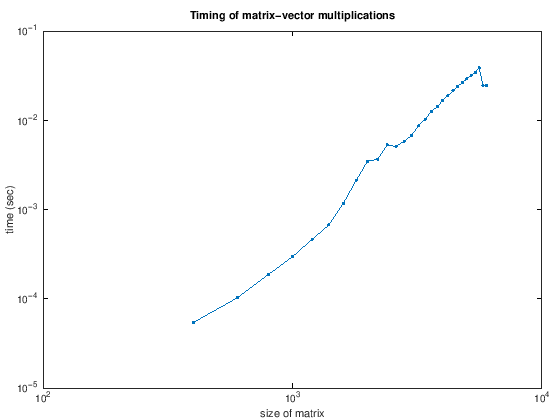

In [65]:
loglog(n_,t_,'.-')
xlabel('size of matrix'), ylabel('time (sec)')
title('Timing of matrix-vector multiplications')

You can see that the graph is trending to a straight line of positive slope. For comparison, we can plot a line that represents  growth exactly. (All such lines have slope equal to 2.)

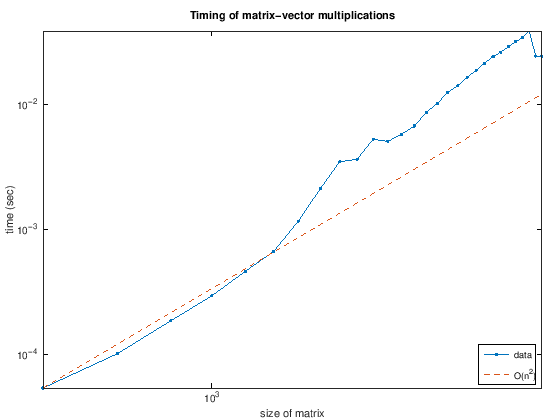

In [66]:
loglog(n_,t_,'.-')
xlabel('size of matrix'), ylabel('time (sec)')
title('Timing of matrix-vector multiplications')
hold on, loglog(n_,t_(1)*(n_/n_(1)).^2,'--')
axis tight
legend('data','O(n^2)','location','southeast')

The full story of the execution times is complicated, but the asymptotic approach to  is unmistakable.

Example 2.5.5 Flops 3

We'll test the conclusion of  flops experimentally, using the built-in lu function instead of the purely instructive lufact.

In [67]:
n_ = (200:100:2400)';
t_ = 0*n_;
for i = 1:length(n_)
    n = n_(i);
    A = randn(n,n);  
    tic  % start a timer
    for j = 1:6,  [L,U] = lu(A);  end
    t = toc;  % read the timer
    t_(i) = t/6;  
end

We plot the performance on a log-log graph and compare it to . The result could vary significantly from machine to machine. 

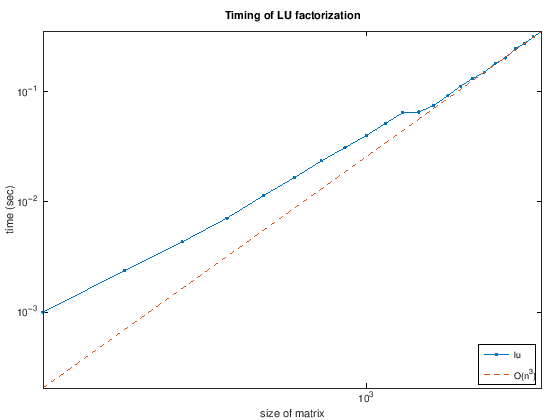

In [68]:
loglog(n_,t_,'.-')
hold on, loglog(n_,t_(end)*(n_/n_(end)).^3,'--')
axis tight
xlabel('size of matrix'), ylabel('time (sec)')
title('Timing of LU factorization')
legend('lu','O(n^3)','location','southeast')

### Example 2.6.1 Pivot Fail

Here is the previously solved system.

In [69]:
A = [2 0 4 3 ; -4 5 -7 -10 ; 1 15 2 -4.5 ; -2 0 2 -13]
b = [ 4; 9; 29; 40 ]

A =

    2.00000    0.00000    4.00000    3.00000
   -4.00000    5.00000   -7.00000  -10.00000
    1.00000   15.00000    2.00000   -4.50000
   -2.00000    0.00000    2.00000  -13.00000

b =

    4
    9
   29
   40



It has a perfectly good solution, obtainable through LU factorization. 

first we need a function:

In [70]:
function x = forwardsub(L,b)
% FORWARDSUB   Solve a lower triangular linear system.
% Input:
%   L    lower triangular square matrix (n by n)
%   b    right-hand side vector (n by 1)   
% Output:
%   x    solution of Lx=b (n by 1 vector)

n = length(L);
x = zeros(n,1);
for i = 1:n
  x(i) = ( b(i) - L(i,1:i-1)*x(1:i-1) ) / L(i,i);
end

end

In [71]:
[L,U] = lufact(A);
x = backsub( U, forwardsub(L,b) )

x =

  -3
   1
   4
  -2



If we swap the second and fourth equations, nothing essential is changed, and MATLAB still finds the solution.

In [72]:
A([2 4],:) = A([4 2],:);  
b([2 4]) = b([4 2]); 
x = A\b

x =

  -3.0000
   1.0000
   4.0000
  -2.0000



However, LU factorization fails.

In [73]:
[L,U] = lufact(A);
L

    lufact at line 14 column 12
    lufact at line 14 column 12
L =

   1.00000   0.00000   0.00000   0.00000
  -1.00000   1.00000   0.00000   0.00000
   0.50000       Inf   1.00000   0.00000
  -2.00000       Inf       NaN   1.00000



### Example 2.6.2 Pivot Fix

Here is the system that ``broke" LU factorization for us.

In [74]:
A = [ 2 0 4 3; -2 0 2 -13 ; 1 15 2 -4.5 ; -4 5 -7 -10 ];
b = [ 4; 40; 29; 9 ];

When we use the built-in lu function with three outputs, we get the elements of the PLU factorization.

In [75]:
[L,U,P] = lu(A)

L =

   1.00000   0.00000   0.00000   0.00000
  -0.25000   1.00000   0.00000   0.00000
   0.50000  -0.15385   1.00000   0.00000
  -0.50000   0.15385   0.08333   1.00000

U =

   -4.00000    5.00000   -7.00000  -10.00000
    0.00000   16.25000    0.25000   -7.00000
    0.00000    0.00000    5.53846   -9.07692
    0.00000    0.00000    0.00000   -0.16667

P =

Permutation Matrix

   0   0   0   1
   0   0   1   0
   0   1   0   0
   1   0   0   0



We can solve this as before by incorporating the permutation. 

In [76]:
x = backsub( U, forwardsub(L,P*b) )

x =

  -3.0000
   1.0000
   4.0000
  -2.0000



However, if we use just two outputs with lu, we get  as the first result.

In [77]:
[PtL,U] = lu(A)

PtL =

  -0.50000   0.15385   0.08333   1.00000
   0.50000  -0.15385   1.00000   0.00000
  -0.25000   1.00000   0.00000   0.00000
   1.00000   0.00000   0.00000   0.00000

U =

   -4.00000    5.00000   -7.00000  -10.00000
    0.00000   16.25000    0.25000   -7.00000
    0.00000    0.00000    5.53846   -9.07692
    0.00000    0.00000    0.00000   -0.16667



MATLAB has engineered the backslash so that systems with triangular or permuted triangular structure are solved with the appropriate style of triangular substitution.

In [78]:
x = U \ (PtL\b)

x =

  -3.0000
   1.0000
   4.0000
  -2.0000



The pivoted factorization and triangular substitutions are done silently and automatically when backslash is called on the original matrix. 

In [79]:
x = A\b

x =

  -3.0000
   1.0000
   4.0000
  -2.0000



### Example 2.7.1 Vector Norms

In MATLAB one uses the norm command.

In [80]:
x = [2;-3;1;-1];
twonorm = norm(x)         % or norm(x,2)
infnorm = norm(x,inf)
onenorm = norm(x,1)

twonorm =  3.8730
infnorm =  3
onenorm =  7


### Example 2.7.2 Matrix Norms

In [81]:
A = [ 2  0; 1  -1 ]

A =

   2   0
   1  -1



The default norm returned by the norm command is the 2-norm.

In [82]:
twonorm = norm(A)

twonorm =  2.2882


You can get the 1-norm as well.

In [83]:
onenorm = norm(A,1)

onenorm =  3


The 1-norm is equivalent to 

In [84]:
max( sum(abs(A),1) )   % sum along rows (1st matrix dimension)

ans =  3


Similarly, we can get the -norm and check our formula for it.

In [85]:
infnorm = norm(A,inf)
max( sum(abs(A),2) )   % sum along columns (2nd matrix dimension)

infnorm =  2
ans =  2


Here we illustrate the geometric interpretation of the 2-norm. First, we will sample a lot of vectors on the unit circle in . 

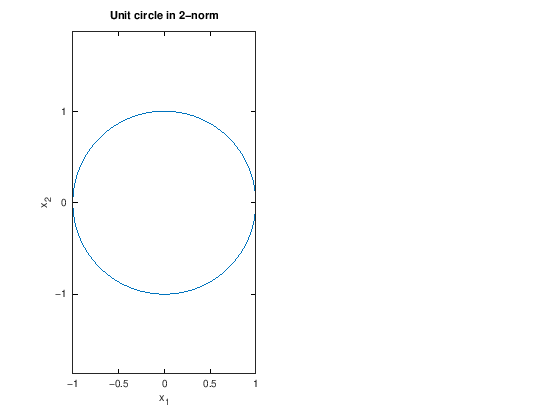

In [86]:
theta = linspace(0,2*pi,601);
x = [ cos(theta); sin(theta) ];  % 601 unit columns
subplot(1,2,1), plot(x(1,:),x(2,:)), axis equal
title('Unit circle in 2-norm')
xlabel('x_1'),  ylabel('x_2')

We can apply  to every column of  simply by using

In [87]:
Ax = A*x;

We superimpose the image of the unit circle with the circle whose radius is , and display multiple plots with the subplot command.

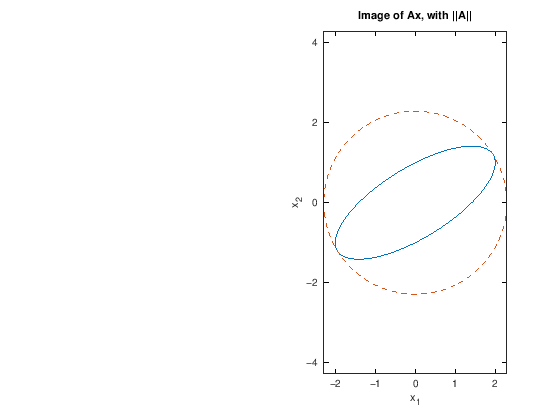

In [88]:
subplot(1,2,2), plot(Ax(1,:),Ax(2,:)), axis equal
hold on, plot(twonorm*x(1,:),twonorm*x(2,:),'--')
title('Image of Ax, with ||A||')
xlabel('x_1'),  ylabel('x_2')

### Example 2.8.1 Conditioning

MATLAB has a function cond to compute . The family of Hilbert matrices is famously badly conditioned. Here is the  case. 

In [89]:
A = hilb(7);
kappa = cond(A)

kappa =  475367356.58313


Next we engineer a linear system problem to which we know the exact answer.

In [90]:
x_exact = (1:7)';
b = A*x_exact;

Now we perturb the data randomly but with norm .

In [91]:
randn('state',333);          % reproducible results 
dA = randn(size(A));  dA = 1e-12*(dA/norm(dA));
db = randn(size(b));  db = 1e-12*(db/norm(db));

We solve the perturbed problem using built-in pivoted LU and see how the solution was changed.

In [92]:
x = (A+dA) \ (b+db); 
dx = x - x_exact;

Here is the relative error in the solution.

In [93]:
rel_error = norm(dx) / norm(x_exact)

rel_error =  0.000067441


And here are upper bounds predicted using the condition number of the original matrix. 

In [94]:
b_bound = kappa * 1e-12/norm(b)
A_bound = kappa * 1e-12/norm(A)

b_bound =  0.000040852
A_bound =  0.00028621


Even if we don't make any manual perturbations to the data, machine epsilon does when we solve the linear system numerically.

In [95]:
x = A\b;
rel_error = norm(x - x_exact) / norm(x_exact)
rounding_bound = kappa*eps

rel_error =  0.00000000040406
rounding_bound =  0.00000010555


Because , it's possible to lose 8 digits of accuracy in the process of passing from  and  to . That's independent of the algorithm; it's inevitable once the data are expressed in double precision. 

Now we choose an even more poorly conditioned matrix from this family.

In [96]:
A = hilb(14);
kappa = cond(A)

kappa =    6.2008e+17


Before we compute the solution, note that  exceeds 1/eps. In principle we might end up with an answer that is completely wrong.

In [97]:
rounding_bound = kappa*eps

rounding_bound =  137.69


MATLAB will notice the large condition number and warn us not to expect much from the result. 

In [98]:
x_exact = (1:14)';
b = A*x_exact;  x = A\b;

In fact the error does exceed 100%.

In [99]:
relative_error = norm(x_exact - x) / norm(x_exact)

relative_error =  0.0052831


### Example 2.9.1 Banded

Here is a matrix with both lower and upper bandwidth equal to one. Such a matrix is called tridiagonal.

In [100]:
A = [ 2 -1  0  0  0  0
      4  2 -1  0  0  0
      0  3  0 -1  0  0
      0  0  2  2 -1  0
      0  0  0  1  1 -1
      0  0  0  0  0  2 ]

A =

   2  -1   0   0   0   0
   4   2  -1   0   0   0
   0   3   0  -1   0   0
   0   0   2   2  -1   0
   0   0   0   1   1  -1
   0   0   0   0   0   2



We can extract the elements on any diagonal using the diag command. The "main'' or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [101]:
diag_main = diag(A,0)'

diag_plusone = diag(A,1)'

diag_minusone = diag(A,-1)'

diag_main =

   2   2   0   2   1   2

diag_plusone =

  -1  -1  -1  -1  -1

diag_minusone =

   4   3   2   1   0



We can also put whatever numbers we like onto any diagonal with the diag command.

In [102]:
A = A + diag([5 8 6 7],2)

A =

   2  -1   5   0   0   0
   4   2  -1   8   0   0
   0   3   0  -1   6   0
   0   0   2   2  -1   7
   0   0   0   1   1  -1
   0   0   0   0   0   2



Here is what happens when we factor this matrix without pivoting. 

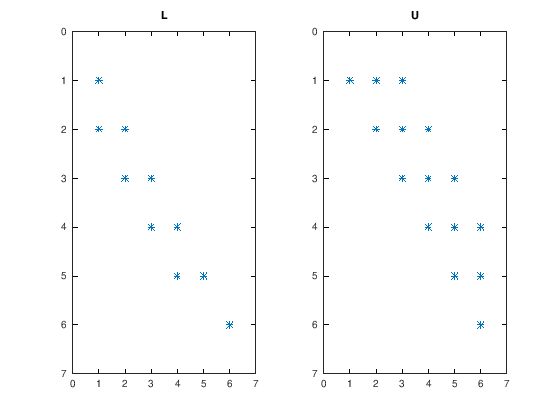

In [103]:
[L,U] = lufact(A);
subplot(1,2,1), spy(L), title('L')
subplot(1,2,2), spy(U), title('U')

Observe that the factors preserve the lower and upper bandwidth of the original matrix. However, if we introduce row pivoting, this structure may be destroyed.

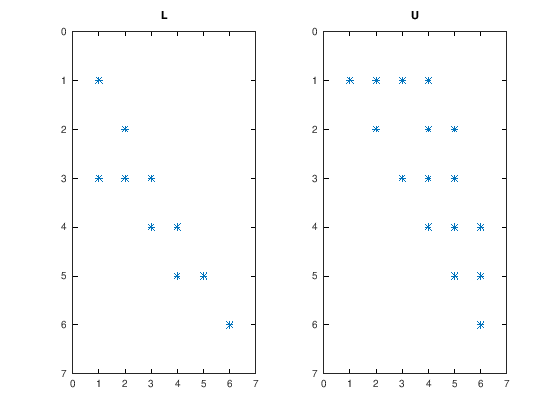

In [104]:
[L,U,P] = lu(A);
subplot(1,2,1), spy(L), title('L')
subplot(1,2,2), spy(U), title('U')

### Example 2.9.2 Banded Timing

We'll use a large banded matrix to observe the speedup possible in LU factorization.

In [105]:
n = 8000;
A = diag(1:n) + diag(n-1:-1:1,1) + diag(ones(n-1,1),-1);

If we factor the matrix as is, MATLAB has no idea that it could be exploiting the fact that it is tridiagonal.

In [106]:
tic, [L,U] = lu(A); toc

Elapsed time is 9.47251 seconds.


But if we convert the matrix to a sparse one, the time required gets a lot smaller. 

In [107]:
tic, [L,U] = lu(sparse(A)); toc

Elapsed time is 0.141088 seconds.


### Example 2.9.3 Symmetric LU

We begin with a symmetric . 

In [108]:
A = [  2     4     4     2
       4     5     8    -5
       4     8     6     2
       2    -5     2   -26 ];

Carrying out our usual elimination in the first column leads us to 

In [109]:
L1 = eye(4); L1(2:4,1) = [-2;-2;-1];
A1 = L1*A

A1 =

    2    4    4    2
    0   -3    0   -9
    0    0   -2   -2
    0   -9   -2  -28



But now let's note that if we transpose this result, we have the same first column as before! So we could apply  again and then transpose back.

In [110]:
A2 = (L1*A1')'

A2 =

    2    0    0    0
    0   -3    0   -9
    0    0   -2   -2
    0   -9   -2  -28



Using transpose identities, this is just

In [111]:
A2 = A1*L1'

A2 =

    2    0    0    0
    0   -3    0   -9
    0    0   -2   -2
    0   -9   -2  -28



Now you can see how we proceed down and to the right, eliminating in a column and then symmetrically in the corresponding row.

In [112]:
L2 = eye(4);  L2(3:4,2) = [0;-3]; 
A3 = L2*A2*L2'

A3 =

   2   0   0   0
   0  -3   0   0
   0   0  -2  -2
   0   0  -2  -1



Finally, we arrive at a diagonal matrix.

In [113]:
L3 = eye(4); L3(4,3) = -1;
D = L3*A3*L3'

D =

   2   0   0   0
   0  -3   0   0
   0   0  -2   0
   0   0   0   1



### Example 2.9.4 Cholesky

Here is a simple trick for turning any square matrix into a symmetric one.

In [114]:
A = magic(4) + eye(4);
B = A+A'

B =

   34    7   12   17
    7   24   17   22
   12   17   14   27
   17   22   27    4



Picking a symmetric matrix at random, there is little chance that it will be positive definite. Fortunately, the built-in Cholesky factorization chol always detects this property. The following would cause an error if run:

In [115]:
R = chol(B) 

error: chol: input matrix must be positive definite


There is a different trick for making an SPD matrix from (almost) any other matrix. 

In [116]:
B = A'*A

B =

   411   213   224   377
   213   393   385   234
   224   385   383   233
   377   234   233   381



In [117]:
R = chol(B)

R =

   20.27313   10.50652   11.04911   18.59604
    0.00000   16.81110   15.99612    2.29732
    0.00000    0.00000    2.24531   -4.10534
    0.00000    0.00000    0.00000    3.61329



In [118]:
norm( R'*R - B )

ans =    6.8616e-14


A word of caution: chol does not check symmetry; in fact, it doesn't even look at the lower triangle of the input matrix.

In [119]:
chol( triu(B) )

ans =

   20.27313   10.50652   11.04911   18.59604
    0.00000   16.81110   15.99612    2.29732
    0.00000    0.00000    2.24531   -4.10534
    0.00000    0.00000    0.00000    3.61329

